<a href="https://colab.research.google.com/github/daniolivaglez/03MAIR-Algoritmos-De-Optimizacion/blob/main/AG2/Daniel_Oliva_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad Guiada 2
Nombre: Daniel Oliva González <br>
Link: https://colab.research.google.com/drive/1FBfplQcL67nTUAUqaUt3tQ21nGTQzbXX?usp=sharing
<br>



## Viaje por el río

In [8]:
import math as m
import itertools
import time
import random

A continuación, se crea la matriz de tarifas:

In [ ]:
tarifas = [
[0,5,4,3,m.inf,m.inf,m.inf],   #desde nodo 0
[m.inf,0,m.inf,2,3,m.inf,11],  #desde nodo 1
[m.inf,m.inf, 0,1,m.inf,4,10], #desde nodo 2
[m.inf,m.inf,m.inf, 0,5,6,9],
[m.inf,m.inf, m.inf,m.inf,0,m.inf,4],
[m.inf,m.inf, m.inf,m.inf,m.inf,0,3],
[m.inf,m.inf,m.inf,m.inf,m.inf,m.inf,0]
]

In [ ]:
def preciosTarifas(TARIFAS):
  ## se calcula el número de nodos
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios
  PRECIOS = [ [m.inf]*N for i in [m.inf]*N]  #n x n 
  RUTA = [ [""]*N for i in [""]*N]
  
  ## se recorren todas las posibilidades
  ## desde 0 a la longitud menos uno, por ejemplo, si la longitud es 4, será desde 0 a 3
  for i in range(N-1):
    ## en este caso, será desde el siguiente valor de i hasta uno menos de la longitud
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      ## se comprueba que no hay ningún nodo intermedio tal que haga menor el coste, en el caso de que lo hubiese, se actualiza la ruta y el costo
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA

A continuación, se calculan los precios y la ruta y se escriben por pantalla los resultados.

In [ ]:
precios,ruta = preciosTarifas(tarifas) 

## se presenta por pantalla todos los precios calculados
print("PRECIOS")
for i in range(len(tarifas)):
  print(precios[i])

## se escribe por pantalla la ruta para ir a un nodo determinado
print("\nRUTA")  
for i in range(len(tarifas)):
  print(ruta[i]) 


PRECIOS
[inf, 5, 4, 3, 8, 8, 11]
[inf, inf, inf, 2, 3, 8, 7]
[inf, inf, inf, 1, 6, 4, 7]
[inf, inf, inf, inf, 5, 6, 9]
[inf, inf, inf, inf, inf, inf, 4]
[inf, inf, inf, inf, inf, inf, 3]
[inf, inf, inf, inf, inf, inf, inf]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


Por último, se crea una función que devuelva la ruta a seguir desde un nodo a otro según la matriz de ruta. 

In [ ]:
def calcularRuta(RUTA, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcularRuta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

print("\nLa ruta es:")  
calcularRuta(ruta, 0, 6) 


La ruta es:


'0,0,2,5'

## Problema de asignación de tareas

Primero se define la matriz de costes 

In [1]:
costes=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

Se va a crear una función la cual devuelva el resultado para una solución parcial.

In [2]:
def calcularValor(solucion, costes):
  ## se inicializa el valor a 0
  valor = 0
  ## se recorre todo la solucion
  for i in range(len(solucion)):
    ## se va sumando según el agente que haga la tarea
    valor += costes[i][solucion[i]]
  return valor

A continuación, se va a hacer una prueba

In [3]:
calcularValor((0, 1, 2, 3), costes)

73

A la hora de realizar las cotas se va a introducir la **modificación** comentada en clase, para no comprobar valores repetidos. En este caso, lo que se va a hacer es eliminar de la lista de agentes (o tareas según se defina la matriz) los que ya se encuentran en la solución.

In [4]:
def CI(S,COSTES):
  S = list(S)
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  a = list(range(len(COSTES)))
  restantes = list(set(a)-set(S))
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in restantes  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  a = list(range(len(COSTES)))
  restantes = list(set(a)-set(S))
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in restantes  ])
  return VALOR

CS((0,1),costes)

74

El siguiente paso será crear una función que permita ver los nodos restantes posibles.

In [5]:
#Genera tantos hijos como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crearHijos(NODO, N):
  HIJOS = []
  for i in range(N):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

El siguiente paso es crear una función que genera todas las posibilidades del árbol y se queda con la mejor solución.

In [6]:
def ramificacionYPoda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = calcularValor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crearHijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 # Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
   
  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
      
ramificacionYPoda(costes)

La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 61}]  en  14  iteraciones  para dimension:  4


**## Parte individual**

Respecto a la complejidad del algoritmo en fuerza bruta sería T(n)= n + 7: n debido al bucle for y 7 por las operaciones elementales contadas (igualaciones, acceso a matriz y comparaciones), no sé si la instrucción que acompaña al bucle for afectaría a la complejidad. Entonces, el orden de complejidad es O(n).
El siguiente código es el algoritmo por fuerza bruta:

In [9]:
def fuerzaBruta(costes):
  valor = m.inf
  solucion = ()
  for s in list(itertools.permutations(range(len(costes)))):
    valor_temp = calcularValor(s,costes)
    if valor_temp < valor:
      valor = valor_temp
      solucion = s

  print("la solución es: ", s, "con valor: ", valor)

fuerzaBruta(costes)

la solución es:  (3, 2, 1, 0) con valor:  61


Ahora se va a comparar el tiempo de usar fuerza bruta y ramificación y poda con varias dimensiones de matrices, empezando con la matriz dada.

In [10]:
tiempo_inicio_fb = time.time()
fuerzaBruta(costes)
tiempo_fin_fb = time.time()
print(tiempo_fin_fb - tiempo_inicio_fb)

la solución es:  (3, 2, 1, 0) con valor:  61
0.0015876293182373047


In [11]:
tiempo_inicio_ryp = time.time()
ramificacionYPoda(costes)
tiempo_fin_ryp = time.time()
print(tiempo_fin_ryp - tiempo_inicio_ryp)

La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 61}]  en  14  iteraciones  para dimension:  4
0.0024373531341552734


Como se puede observar para dimensión 4 se tarda menos tiempo con fuerza bruta. Esto se debe a que tampoco hay muchas combinaciones. A continuación, se van a hacer matrices de dimensión 5 hasta 10 y se hará la prueba.

In [13]:
matriz_5d = [[random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25)] for x in range(5)]
matriz_6d = [[random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25)] for x in range(6)]
matriz_7d = [[random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25)] for x in range(7)]
matriz_8d = [[random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25)] for x in range(8)]
matriz_9d = [[random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25)] for x in range(9)]
matriz_10d = [[random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25)] for x in range(10)]

In [14]:
tiempo_inicio_fb = time.time()
fuerzaBruta(matriz_5d)
tiempo_fin_fb = time.time()
print("El tiempo de fuerza bruta es: ", tiempo_fin_fb - tiempo_inicio_fb)

la solución es:  (4, 3, 2, 1, 0) con valor:  27
El tiempo de fuerza bruta es:  0.0011262893676757812


In [15]:
tiempo_inicio_ryp = time.time()
ramificacionYPoda(matriz_5d)
tiempo_fin_ryp = time.time()
print("El tiempo de ramificación y poda es: ", tiempo_fin_ryp - tiempo_inicio_ryp)

La solucion final es: [{'s': (0, 1, 3, 2, 4), 'ci': 31}]  en  16  iteraciones  para dimension:  5
El tiempo de ramificación y poda es:  0.0027000904083251953


In [16]:
tiempo_inicio_fb = time.time()
fuerzaBruta(matriz_6d)
tiempo_fin_fb = time.time()
print("El tiempo de fuerza bruta es: ", tiempo_fin_fb - tiempo_inicio_fb)
tiempo_inicio_ryp = time.time()
ramificacionYPoda(matriz_6d)
tiempo_fin_ryp = time.time()
print("El tiempo de ramificación y poda es: ", tiempo_fin_ryp - tiempo_inicio_ryp)

la solución es:  (5, 4, 3, 2, 1, 0) con valor:  42
El tiempo de fuerza bruta es:  0.0022449493408203125
La solucion final es: [{'s': (2, 0, 4, 3, 5, 1), 'ci': 42}]  en  96  iteraciones  para dimension:  6
El tiempo de ramificación y poda es:  0.008113384246826172


In [17]:
tiempo_inicio_fb = time.time()
fuerzaBruta(matriz_7d)
tiempo_fin_fb = time.time()
print("El tiempo de fuerza bruta es: ", tiempo_fin_fb - tiempo_inicio_fb)
tiempo_inicio_ryp = time.time()
ramificacionYPoda(matriz_7d)
tiempo_fin_ryp = time.time()
print("El tiempo de ramificación y poda es: ", tiempo_fin_ryp - tiempo_inicio_ryp)

la solución es:  (6, 5, 4, 3, 2, 1, 0) con valor:  28
El tiempo de fuerza bruta es:  0.008369207382202148
La solucion final es: [{'s': (3, 4, 5, 0, 2, 1, 6), 'ci': 28}]  en  28  iteraciones  para dimension:  7
El tiempo de ramificación y poda es:  0.0019583702087402344


Como se va viendo al aumentar la dimensión de la matriz va aumentando el tiempo, especialmente en el algoritmo de fuerza bruta, puesto que realiza todas las posibles combinaciones

In [18]:
tiempo_inicio_fb = time.time()
fuerzaBruta(matriz_8d)
tiempo_fin_fb = time.time()
print("El tiempo de fuerza bruta es: ", tiempo_fin_fb - tiempo_inicio_fb)
tiempo_inicio_ryp = time.time()
ramificacionYPoda(matriz_8d)
tiempo_fin_ryp = time.time()
print("El tiempo de ramificación y poda es: ", tiempo_fin_ryp - tiempo_inicio_ryp)

la solución es:  (7, 6, 5, 4, 3, 2, 1, 0) con valor:  35
El tiempo de fuerza bruta es:  0.11151814460754395
La solucion final es: [{'s': (2, 6, 1, 7, 5, 0, 3, 4), 'ci': 41}]  en  570  iteraciones  para dimension:  8
El tiempo de ramificación y poda es:  0.039817094802856445


In [19]:
tiempo_inicio_fb = time.time()
fuerzaBruta(matriz_9d)
tiempo_fin_fb = time.time()
print("El tiempo de fuerza bruta es: ", tiempo_fin_fb - tiempo_inicio_fb)
tiempo_inicio_ryp = time.time()
ramificacionYPoda(matriz_9d)
tiempo_fin_ryp = time.time()
print("El tiempo de ramificación y poda es: ", tiempo_fin_ryp - tiempo_inicio_ryp)

la solución es:  (8, 7, 6, 5, 4, 3, 2, 1, 0) con valor:  42
El tiempo de fuerza bruta es:  0.44649434089660645
La solucion final es: [{'s': (4, 3, 7, 5, 6, 1, 2, 0, 8), 'ci': 44}]  en  1425  iteraciones  para dimension:  9
El tiempo de ramificación y poda es:  0.19802522659301758


In [21]:
tiempo_inicio_fb = time.time()
fuerzaBruta(matriz_10d)
tiempo_fin_fb = time.time()
print("El tiempo de fuerza bruta es: ", tiempo_fin_fb - tiempo_inicio_fb)
tiempo_inicio_ryp = time.time()
ramificacionYPoda(matriz_10d)
tiempo_fin_ryp = time.time()
print("El tiempo de ramificación y poda es: ", tiempo_fin_ryp - tiempo_inicio_ryp)

la solución es:  (9, 8, 7, 6, 5, 4, 3, 2, 1, 0) con valor:  29
El tiempo de fuerza bruta es:  4.632487058639526
La solucion final es: [{'s': (0, 4, 7, 1, 2, 6, 9, 3, 5, 8), 'ci': 29}]  en  5287  iteraciones  para dimension:  10
El tiempo de ramificación y poda es:  2.718282699584961


Como se puede ver cuando se alcanza dimensión 10, el tiempo se aproxima a los 5 segundos en fuerza bruta y se acerca a 1 segundo en ramificación y poda. Ahora se va a hacer una matriz de dimensión 11.

In [22]:
matriz_11d = [[random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25)] for x in range(11)]

In [24]:
tiempo_inicio_fb = time.time()
fuerzaBruta(matriz_11d)
tiempo_fin_fb = time.time()
print("El tiempo de fuerza bruta es: ", tiempo_fin_fb - tiempo_inicio_fb)

la solución es:  (10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0) con valor:  30
El tiempo de fuerza bruta es:  55.99885368347168


In [25]:
tiempo_inicio_ryp = time.time()
ramificacionYPoda(matriz_11d)
tiempo_fin_ryp = time.time()
print("El tiempo de ramificación y poda es: ", tiempo_fin_ryp - tiempo_inicio_ryp)

La solucion final es: [{'s': (4, 3, 2, 1, 8, 10, 7, 0, 6, 9, 5), 'ci': 32}]  en  3824  iteraciones  para dimension:  11
El tiempo de ramificación y poda es:  1.45991849899292


Con una matriz de dimensión 11 se puede ver que el tiempo de fuerza bruta es muchísimo mayor que el de ramificación y poda. Es muy posible que para una matriz de dimensión 12 ya no sirva fuerza bruta.

In [26]:
matriz_12d = [[random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25)] for x in range(12)]

In [30]:
#tiempo_inicio_fb = time.time()
#fuerzaBruta(matriz_12d)
#tiempo_fin_fb = time.time()
#print("El tiempo de fuerza bruta es: ", tiempo_fin_fb - tiempo_inicio_fb)
tiempo_inicio_ryp = time.time()
ramificacionYPoda(matriz_12d)
tiempo_fin_ryp = time.time()
print("El tiempo de ramificación y poda es: ", tiempo_fin_ryp - tiempo_inicio_ryp)

La solucion final es: [{'s': (11, 5, 3, 4, 7, 8, 0, 10, 1, 2, 9, 6), 'ci': 39}]  en  19749  iteraciones  para dimension:  12
El tiempo de ramificación y poda es:  46.24612307548523


Para una matriz de dimensión 12 el algoritmo de ramificación y poda empieza a tardar un tiempo considerable. El algoritmo de fuerza bruta no permite obtener una solución en este caso. Ahora se hará la prueba para una matriz de dimensión 13.

In [31]:
matriz_13d = [[random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25)] for x in range(13)]
tiempo_inicio_ryp = time.time()
ramificacionYPoda(matriz_13d)
tiempo_fin_ryp = time.time()
print("El tiempo de ramificación y poda es: ", tiempo_fin_ryp - tiempo_inicio_ryp)

La solucion final es: [{'s': (7, 9, 10, 0, 11, 2, 3, 6, 4, 1, 12, 8, 5), 'ci': 40}]  en  8713  iteraciones  para dimension:  13
El tiempo de ramificación y poda es:  8.936339378356934


Como se puede observar ha tardado un tiempo menor el algoritmo de ramificación y poda con la matriz de dimensión 13 que con la de 12. Esto se debe a que en la matriz de dimensión 13 realizó más de 19000 iteraciones y en la de 13 aproximadamente la mitad. Por último, se va a probar con una de dimensión 14.

In [34]:
#matriz_14d = [[random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25),random.randrange(1,25)] for x in range(14)]
#tiempo_inicio_ryp = time.time()
#ramificacionYPoda(matriz_14d)
#tiempo_fin_ryp = time.time()
#print("El tiempo de ramificación y poda es: ", tiempo_fin_ryp - tiempo_inicio_ryp)

**A modo de resumen**, el algoritmo de fuerza bruta deja de dar una solución a partir de una matriz de dimensión 12. El de ramificación y poda en este caso a partir de la de dimensión 14 dejaría de funcionar.

## Descenso del Gradiente

In [35]:
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!) 

El siguiente paso será definir la función y el gradiente (derivada de la función)

In [36]:
f  = lambda X:      X[0]**2+X[1]**2      #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

A continuación, se va a buscar la solución y se hará una representación gráfica. Se ha intentado que la tasa de aprendizaje vaya cambiando según pasan las iteraciones

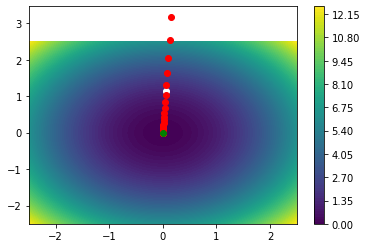

Solucion: [6.959226211577363e-50, 1.3940709427194057e-48] 1.948276876280963e-96


In [49]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango=2.5
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")


#Iteraciones
for i in range(500):
  #Tasa de aprendizaje
  TA=.1 - 0.0001**i
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))

A continuación se hará para la función y su respectivo gradiente:

In [50]:
f2 = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.e**X[1])
## para obtener el gradiente se deriva respecto a X y respecto a Y
df2 = lambda X: [-2*np.sin(2*X[0]+1-np.e**X[1])*np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3)+X[0]*np.cos(2 * X[0] + 1 - np.e**X[1])*np.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3),
                 np.e**X[1]*np.sin(2 * X[0] + 1 - np.e**X[1])*np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) - 1/2*(X[1]*np.cos(2 * X[0] + 1 - np.e**X[1])*np.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3))]

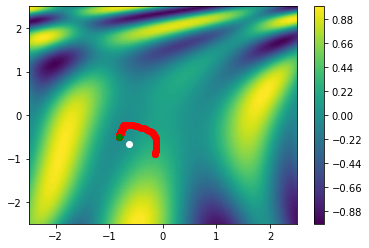

Solucion: [-0.8228971006210326, -0.4993489032821802] -0.04198326424032736


In [53]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango=2.5
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f2([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

ayuda = 0.1
#Iteraciones
for i in range(500):
  #Tasa de aprendizaje
  TA=.1 - ayuda/(i+ayuda)
  grad = df2(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f2(P))